In [1]:
import ROOT
import pandas as pd

Welcome to JupyROOT 6.14/09


In [2]:
SFs = pd.read_csv('DeepCSV_102XSF_WP_V1.csv')
#remove space in column names
new_columns_name = {i: i.strip() for i in SFs.columns}
SFs.rename(columns=new_columns_name,inplace=True) 
SFs.rename(columns={'DeepCSV;OperatingPoint':'OperatingPoint'},inplace=True)
SFs

,OperatingPoint,measurementType,sysType,jetFlavor,etaMin,etaMax,ptMin,ptMax,discrMin,discrMax,formula
0,0,comb,central,1,-2.5,2.5,20,1000,0,1,"""0.917829+(0.00298278*(log(x+19)*(log(x+18)*(..."
1,0,comb,central,0,-2.5,2.5,20,1000,0,1,"""0.917829+(0.00298278*(log(x+19)*(log(x+18)*(..."
2,0,comb,down,1,-2.5,2.5,20,30,0,1,"""0.917829+((0.00298278*(log(x+19)*(log(x+18)*..."
3,0,comb,down,1,-2.5,2.5,30,50,0,1,"""0.917829+((0.00298278*(log(x+19)*(log(x+18)*..."
4,0,comb,down,1,-2.5,2.5,50,70,0,1,"""0.917829+((0.00298278*(log(x+19)*(log(x+18)*..."
5,0,comb,down,1,-2.5,2.5,70,100,0,1,"""0.917829+((0.00298278*(log(x+19)*(log(x+18)*..."
6,0,comb,down,1,-2.5,2.5,100,140,0,1,"""0.917829+((0.00298278*(log(x+19)*(log(x+18)*..."
7,0,comb,down,1,-2.5,2.5,140,200,0,1,"""0.917829+((0.00298278*(log(x+19)*(log(x+18)*..."
8,0,comb,down,1,-2.5,2.5,200,300,0,1,"""0.917829+((0.00298278*(log(x+19)*(log(x+18)*..."
9,0,comb,down,1,-2.5,2.5,300,600,0,1,"""0.917829+((0.00298278*(log(x+19)*(log(x+18)*..."


In [3]:
#remove all space in data
for col in ['sysType','measurementType','formula']:
    SFs[col] = SFs[col].str.strip()

In [4]:
#get combined scale factor formula for bjet
print(SFs[SFs.measurementType=='comb'][SFs.sysType=='central'][SFs.jetFlavor==0])
sfs_formula = SFs[SFs.measurementType=='comb'][SFs.sysType=='central'][SFs.jetFlavor==0].formula

    OperatingPoint measurementType  sysType  jetFlavor  etaMin  etaMax  ptMin  \
1                0            comb  central          0    -2.5     2.5     20   
39               1            comb  central          0    -2.5     2.5     20   
77               2            comb  central          0    -2.5     2.5     20   

    ptMax  discrMin  discrMax  \
1    1000         0         1   
39   1000         0         1   
77   1000         0         1   

                                              formula  
1   "0.917829+(0.00298278*(log(x+19)*(log(x+18)*(3...  
39  "0.909339+(0.00354*(log(x+19)*(log(x+18)*(3-(0...  
77  "0.766992+(0.00894732*(log(x+19)*(log(x+18)*(3...  


/cvmfs/cms.cern.ch/slc7_amd64_gcc820/external/py2-ipykernel/4.10.0/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/cvmfs/cms.cern.ch/slc7_amd64_gcc820/external/py2-ipykernel/4.10.0/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
sfs_formula = [i.replace('"','') for i in sfs_formula]
sfs_formula

['0.917829+(0.00298278*(log(x+19)*(log(x+18)*(3-(0.422392*log(x+18))))))',
 '0.909339+(0.00354*(log(x+19)*(log(x+18)*(3-(0.471623*log(x+18))))))',
 '0.766992+(0.00894732*(log(x+19)*(log(x+18)*(3-(0.423381*log(x+18))))))']

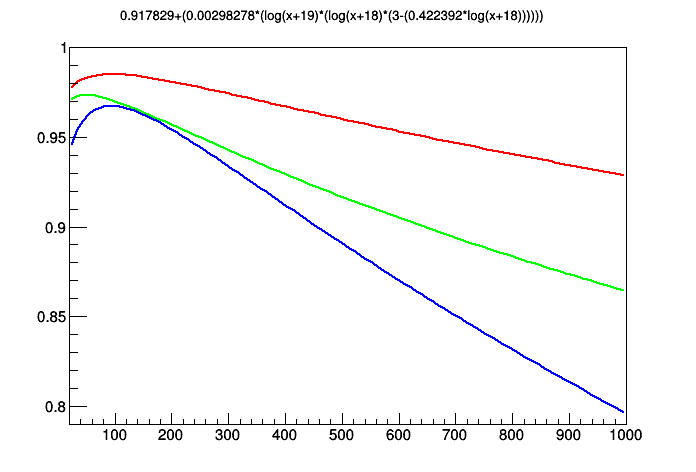

In [8]:
c = ROOT.TCanvas()
func_SFs = []
for form in sfs_formula:
    func_SFs.append(ROOT.TF1(form,form,20,1000))

func_SFs[0].Draw()
func_SFs[0].GetYaxis().SetRangeUser(0.8,1)
func_SFs[0].SetLineColor(2)
func_SFs[1].Draw('same')
func_SFs[1].SetLineColor(3)
func_SFs[2].Draw('same')
func_SFs[2].SetLineColor(4)
c.Draw()